**Importamos bibliotecas**

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

**Importamos funciones de nuestro modulo**

In [25]:
from toolbox_ml_clean import (
    describe_df,
    tipifica_variables,
    get_features_num_regression,
    plot_features_num_regression,
    get_features_cat_regression,
    plot_features_cat_regression
)

In [26]:
import toolbox_ml_clean
import importlib
importlib.reload(toolbox_ml_clean) # Para importar la librería de nuevo y que coja los cambios en el código

<module 'toolbox_ml_clean' from 'c:\\Users\\jose\\Documents\\bootcamp\\Team_Challenge\\ML_toolbox1\\TeamChallenge_team8\\toolbox_ml_clean.py'>

**Cargamos el dataset y mostramos sus primeras líneas**

In [4]:
data = pd.read_csv("./Team_Challenge/data/sleep_health_and_lifestyle_dataset.csv")

data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


**Eliminamos la columna "Person ID"**

In [5]:
data.drop("Person ID", axis = 1, inplace=True)

**Con la funcion "describe_df" visualizamos la informacion del dataset.**

In [6]:
result = describe_df(data)
result

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
Gender,object,0.00000,2,0.534759
Age,int64,0.00000,31,8.288770
Occupation,object,0.00000,11,2.941176
Sleep Duration,float64,0.00000,27,7.219251
Quality of Sleep,int64,0.00000,6,1.604278
Physical Activity Level,int64,0.00000,16,4.278075
Stress Level,int64,0.00000,6,1.604278
BMI Category,object,0.00000,4,1.069519
Blood Pressure,object,0.00000,25,6.684492


**Con la funcion "tipifica_variables" obtenemos el tipo sugerido para cada columna**

In [19]:
result = tipifica_variables(data, umbral_categoria=12, umbral_continua=0.07)
result

,nombre_variable,tipo_sugerido
0,Gender,Binaria
1,Age,Numerica Continua
2,Occupation,Categorica
3,Sleep Duration,Numerica Continua
4,Quality of Sleep,Categorica
5,Physical Activity Level,Numerica Discreta
6,Stress Level,Categorica
7,BMI Category,Categorica
8,Blood Pressure,Numerica Discreta
9,Heart Rate,Numerica Discreta


**Con la funcion "get_features_num_regression" para obtener las columnas con una correlacion mayor al umbral (umbral_corr) con relacion a la variable objetivo (target_col) y que tengan un coeficiente de pearson mayor a "pvalue"**

In [27]:
numerical_features = get_features_num_regression(
    data, 
    target_col="Sleep Duration",
    umbral_corr=0.5, 
    pvalue=0.05
)
print(numerical_features)


['Quality of Sleep', 'Stress Level', 'Heart Rate']


**Con la funcion "plot_features_num_regression" graficamos la relacion de la variable objetivo con las columnas de interés**

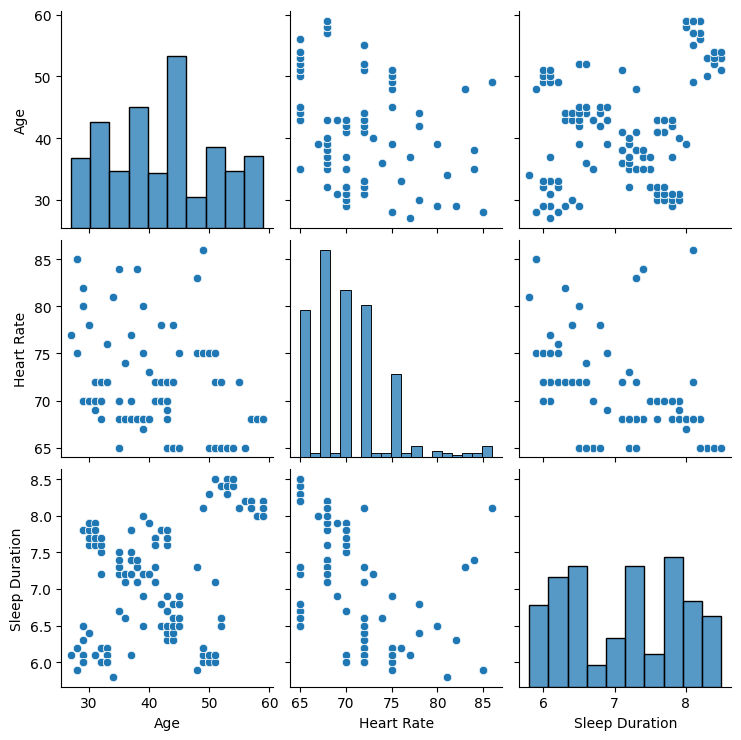

['Age', 'Heart Rate']

In [33]:
plot_features_num_regression(
    data, 
    target_col="Sleep Duration",
    columns=["Age", "Daily Steps","Heart Rate","Physical Activity Level"],
    umbral_corr=0.3, 
    pvalue=0.05
)


**Con la función "get_features_cat_regression" obtenemos la lista de las columnas categoricas**

In [37]:
categorical_features = get_features_cat_regression(
    data, 
    target_col="Sleep Duration",
    pvalue=0.05
)
print(categorical_features)


['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']


c:\Users\jose\Documents\bootcamp\Team_Challenge\ML_toolbox1\TeamChallenge_team8\toolbox_ml_clean.py:217: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estadistico, p_valor = f_oneway(*grupos)


**Con la funcion "plot_features_cat_regression" imprimimos los plots de la variable objetivo con relacion a las variables de interés**

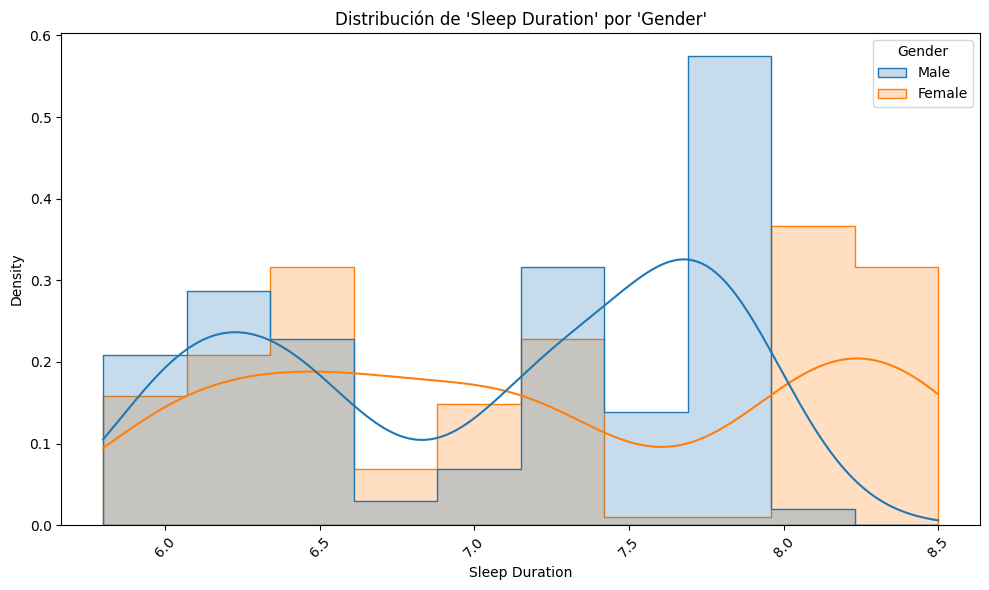

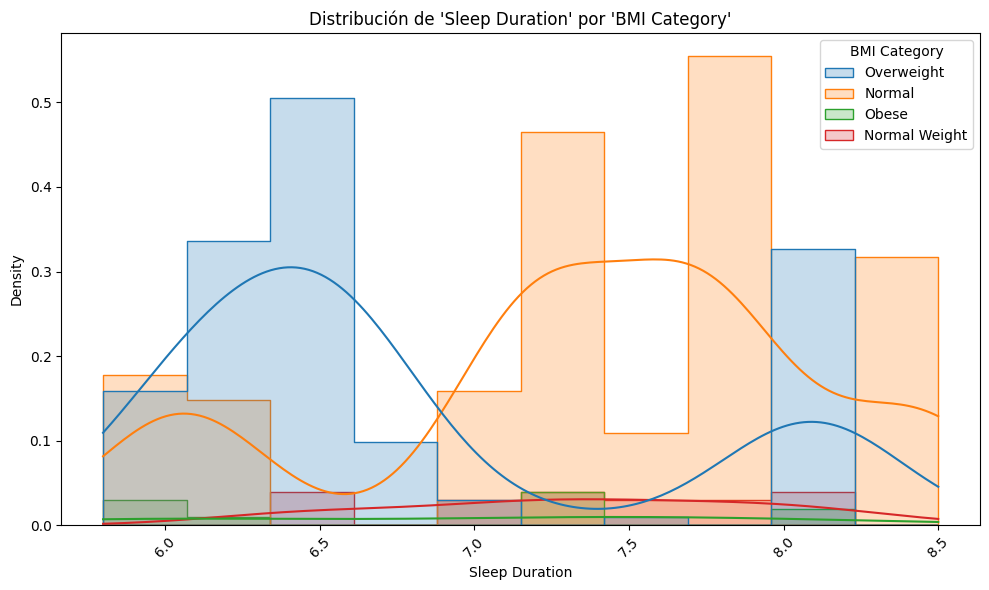

['Gender', 'BMI Category']

In [44]:
plot_features_cat_regression(
    data,
    target_col="Sleep Duration",
    columns=["Gender", "BMI Category"],
    pvalue=0.05,
    fill_na="Desconocido",
    with_individual_plot=False
)
